In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from PIL import Image, ImageChops
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:

IMAGE_SIZE =[500,500]
train_path = '/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/train'
valid_path = '/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/train/*')
print(folders)

['/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/train/Normal', '/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/train/Tuberculosis']


In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# MOdel creation
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 250, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 250, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 250, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 125, 125, 128)     0     

In [ ]:
#cost and optimization method
run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/train',
                                                 target_size = (500,500),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

Found 3750 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/TB_Chest_Radiography_Database/test',
                                            target_size = (500,500),
                                            batch_size = 5,
                                            class_mode = 'categorical')
print(test_set)

Found 386 images belonging to 2 classes.


In [ ]:
for _ in range(50):
    img, label = training_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [ ]:
# fit the Model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=(len(training_set)),
  validation_steps=len(test_set),
  #batch_size=32
)

Epoch 1/25
750/750 [==============================] - 421s 547ms/step - loss: 0.7080 - accuracy: 0.9261 - val_loss: 0.1004 - val_accuracy: 0.9819
Epoch 2/25
750/750 [==============================] - 231s 309ms/step - loss: 0.2597 - accuracy: 0.9717 - val_loss: 0.1639 - val_accuracy: 0.9819
Epoch 3/25
750/750 [==============================] - 232s 309ms/step - loss: 0.4852 - accuracy: 0.9597 - val_loss: 0.3783 - val_accuracy: 0.9767
Epoch 4/25
750/750 [==============================] - 231s 309ms/step - loss: 0.2921 - accuracy: 0.9803 - val_loss: 0.0672 - val_accuracy: 0.9896
Epoch 5/25
750/750 [==============================] - 234s 312ms/step - loss: 0.1928 - accuracy: 0.9851 - val_loss: 0.1347 - val_accuracy: 0.9896
Epoch 6/25
750/750 [==============================] - 234s 312ms/step - loss: 0.1867 - accuracy: 0.9840 - val_loss: 0.7065 - val_accuracy: 0.9715
Epoch 7/25
750/750 [==============================] - 233s 310ms/step - loss: 0.2060 - accuracy: 0.9861 - val_loss: 0.1880 -

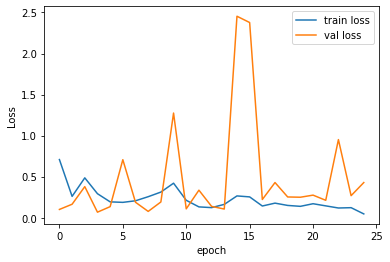

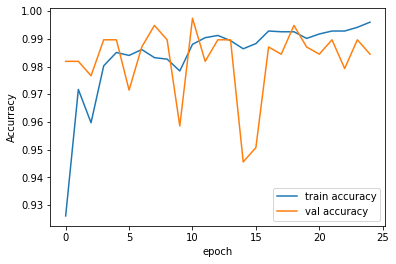

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("Accurracy")
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('Trained_modelTB.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')